#  Incidence du syndrome de la varicelle

Pour mémoire : 

En épidémiologie, le taux d'incidence rapporte le nombre de nouveaux cas d'une pathologie observés pendant une période donnée - population incidente- à la population dont sont issus les cas (pendant cette même période) - population cible -. Il est un des critères les plus importants pour évaluer la fréquence et la vitesse d'apparition d'une pathologie.

Le taux d'incidence s'exprime généralement en « nombre de personnes pour 100 000 personnes par année », afin de permettre des comparaisons entre les populations et dans le temps.

Source : https://www.insee.fr/fr/metadonnees/definition/c1060

In [13]:
%matplotlib inline
# https://matplotlib.org/api/pyplot_api.html
import matplotlib.pyplot as plt
# https://pandas.pydata.org
import pandas as pd
# https://pypi.org/project/isoweek/
import isoweek

Les données de l'incidence du syndrome de la varicelle sont disponibles du site Web du Réseau Sentinelles :  https://www.sentiweb.fr/france/fr/?page=table

Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée.

Nous téléchargeons toujours le jeu de données complet, qui commence en 1990 (et avant ?) et se termine avec une semaine récente.

In [14]:
# URL par défaut sur le portail du réseau Sentinelles
data_url = "https://www.sentiweb.fr/datasets/incidence-PAY-7.csv"
# Fichier local à utiliser dans tous les cas
data_local = "local-syndrome-varicelle.csv"

# https://docs.python.org/fr/3.6/library/os.html
# https://docs.python.org/fr/3.6/library/os.path.html#module-os.path
import os
# https://docs.python.org/fr/3/library/urllib.html
import urllib.request

# Est-ce que le fichier local existe ?
if not os.path.exists(data_local):
    print("Récupération des données via " + data_url)
    urllib.request.urlretrieve(data_url, data_local)

## Données brutes

In [15]:
raw_data = pd.read_csv(data_local, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202032          7   2559      624    4494       4           1   
1     202031          7   1303      100    2506       2           0   
2     202030          7   1385       75    2695       2           0   
3     202029          7    841       10    1672       1           0   
4     202028          7    728        0    1515       1           0   
5     202027          7    986      149    1823       1           0   
6     202026          7    694        0    1454       1           0   
7     202025          7    228        0     597       0           0   
8     202024          7    388        0     959       1           0   
9     202023          7    558        1    1115       1           0   
10    202022          7    277        0     633       0           0   
11    202021          7    602       36    1168       1           0   
12    202020          7    824       20    1628       1           0   
13    202019          7    310        0     753       0           0   
14    202018          7    849       98    1600       1           0   
15    202017          7    272        0     658       0           0   
16    202016          7    758       78    1438       1           0   
17    202015          7   1918      675    3161       3           1   
18    202014          7   3879     2227    5531       6           3   
19    202013          7   7326     5236    9416      11           8   
20    202012          7   8123     5790   10456      12           8   
21    202011          7  10198     7568   12828      15          11   
22    202010          7   9011     6691   11331      14          10   
23    202009          7  13631    10544   16718      21          16   
24    202008          7  10424     7708   13140      16          12   
25    202007          7   8959     6574   11344      14          10   
26    202006          7   9264     6925   11603      14          10   
27    202005          7   8505     6314   10696      13          10   
28    202004          7   7991     5831   10151      12           9   
29    202003          7   5968     4100    7836       9           6   
...      ...        ...    ...      ...     ...     ...         ...   
1519  199126          7  17608    11304   23912      31          20   
1520  199125          7  16169    10700   21638      28          18   
1521  199124          7  16171    10071   22271      28          17   
1522  199123          7  11947     7671   16223      21          13   
1523  199122          7  15452     9953   20951      27          17   
1524  199121          7  14903     8975   20831      26          16   
1525  199120          7  19053    12742   25364      34          23   
1526  199119          7  16739    11246   22232      29          19   
1527  199118          7  21385    13882   28888      38          25   
1528  199117          7  13462     8877   18047      24          16   
1529  199116          7  14857    10068   19646      26          18   
1530  199115          7  13975     9781   18169      25          18   
1531  199114          7  12265     7684   16846      22          14   
1532  199113          7   9567     6041   13093      17          11   
1533  199112          7  10864     7331   14397      19          13   
1534  199111          7  15574    11184   19964      27          19   
1535  199110          7  16643    11372   21914      29          20   
1536  199109          7  13741     8780   18702      24          15   
1537  199108          7  13289     8813   17765      23          15   
1538  199107          7  12337     8077   16597      22          15   
1539  199106          7  10877     7013   14741      19          12   
1540  199105          7  10442     6544   14340      18          11   
1541  199104          7   7913     4563   11263      14           8   
1542  199103          7  15387    10484   20290      27          18   
1543  199102          7  16277  

Ici pas de données manquantes ! :)

## Premier aperçu

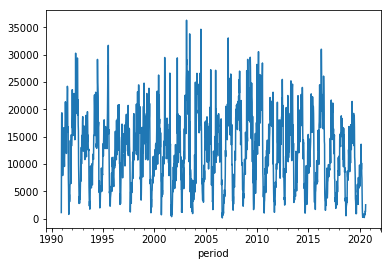

In [16]:
# Fonction précédente de conversion de la date et des numéros de semaine
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

raw_data['period'] = [convert_week(yw) for yw in raw_data['week']]

# Ici pas de soucis avec le "TimeDelta"
sorted_data = raw_data.set_index('period').sort_index()
sorted_data['inc'].plot()

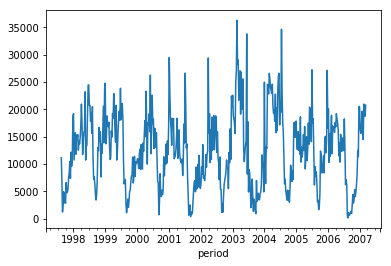

In [17]:
# Un premier pic en 2003 ?
sorted_data['inc'][-1200:-700].plot()

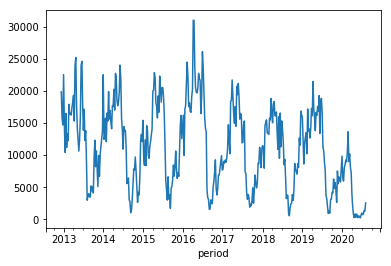

In [18]:
# Un second pic en 2016 ?
sorted_data['inc'][-400:].plot()

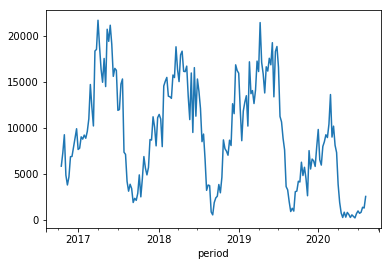

In [19]:
sorted_data['inc'][-200:].plot()

Septembre se situe bien dans les "creux" des incidences :)

## Etude de l'incidence annuelle

Adaptation du code précédent avec les valeurs de la varicelle, donc au 1er septembre et à partir de 1991 :

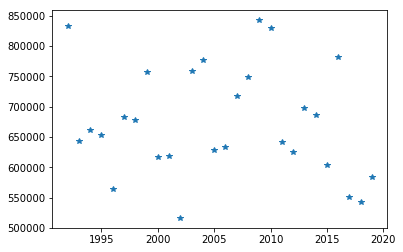

In [20]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
    for y in range(1991,sorted_data.index[-1].year)]

#
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    calc = abs(len(one_year)-52)
    assert calc < 2, "Erreur d'assertion : " + str(calc)
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)

#
yearly_incidence = pd.Series(data=yearly_incidence, index=year)
yearly_incidence.plot(style='*')

Liste triée des incidences, en ordre ascendant (par défaut) :

In [21]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sort_values.html
yearly_incidence.sort_values()

2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

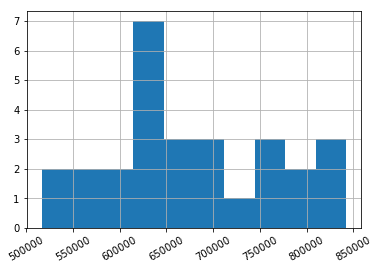

In [22]:
yearly_incidence.hist(xrot=30)

Quelle est l'année avec l'épidémie la plus forte ? 2009

Quelle est l'année avec l'épidémie la plus faible ? 2002